
<h1 align=center><font size = 5>Car prices - 2</font></h1>

### Welcome!
Dans cette section, nous allons voir plusieurs techniques permettant de déterminer l'importance relative des caratéristiques sur la cible : le prix.

### Quelles sont les caractéristiques qui ont le plus d'impact sur le prix ?

## 1. Import Des données

In [1]:
import pandas as pd
import numpy as np

In [3]:
source='clean_df.csv' #on repart su fichier cleané en étape 1, on va ici attaquer l'analyse graphique, on est encore dans la phase préprocess

df = pd.read_csv(source, index_col=0)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-groupe,fuel-type_gas,aspiration_turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,-0.439616,-0.855008,...,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0,faible,1,0
1,1,122,alfa-romero,two,hatchback,rwd,front,94.5,-0.245239,-0.189262,...,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0,Moyenne,1,0
2,2,164,audi,four,sedan,fwd,front,99.8,0.192109,0.143611,...,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0,faible,1,0
3,2,164,audi,four,sedan,4wd,front,99.4,0.192109,0.238717,...,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0,faible,1,0
4,2,122,audi,two,sedan,fwd,front,99.8,0.248803,0.191164,...,3.40,8.5,110,5500.0,12.368421,9.400000,15250.0,faible,1,0


## 2. Analyse graphique des caractéristiques

 Import de "Matplotlib" et "Seaborn".

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### choix de la méthode de visualisation :
Il est important de choisir la bonne méthode selon le type de variable proposé par le dataset.


In [10]:
# list the data types for each column
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-L/100km         float64
highway-L/100km      float64
price                float64
horsepower-groupe     object
fuel-type_gas          int64
aspiration_turbo       int64
dtype: object

Calcul des coefficients de corrélation entre les colonnes de type numérique :

In [11]:
df.corr()['price'].sort_values() #les valeurs proches de 1 sont interessantes

fuel-type_gas       -0.110326
peak-rpm            -0.101616
symboling           -0.082391
compression-ratio    0.071107
stroke               0.082269
normalized-losses    0.133999
height               0.135486
aspiration_turbo     0.179578
bore                 0.543155
wheel-base           0.584642
length               0.690628
width                0.751265
city-L/100km         0.789898
highway-L/100km      0.801118
horsepower           0.809607
curb-weight          0.834415
engine-size          0.872335
price                1.000000
Name: price, dtype: float64

## Variables continues
La corrélation entre les variables numériques et la colonne cible peut être étudiée grâce aux nuages de points : les `regplot` .

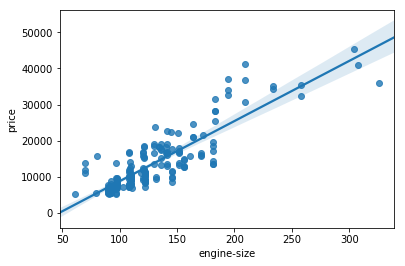

In [13]:
# Engine size et price
sns.regplot(x="engine-size", y="price", data=df)

Calcul du coefficient de corrélation :

In [14]:
df[["engine-size", "price"]].corr() #0.87 montre que l'indice de correlation est très proche

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


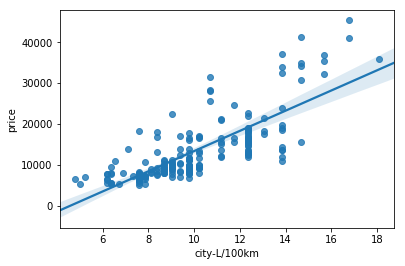

In [16]:
#highway-L/100km et price
sns.regplot(x="city-L/100km", y="price", data=df)

In [18]:
df[['highway-L/100km', 'price']].corr() #idem ici 0.8 montre qu'il y a une certaine correlation entre les 2

,highway-L/100km,price
highway-L/100km,1.000000,0.801118
price,0.801118,1.000000


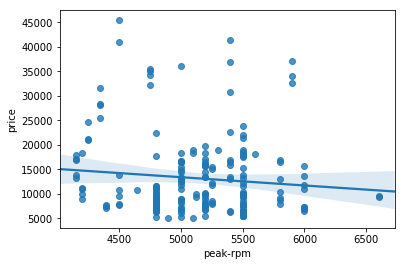

In [19]:
sns.regplot(x="peak-rpm", y="price", data=df)

In [20]:
df[['peak-rpm','price']].corr() #moins ici mais indique peut etre qu'il y a une notion de catégorie plutot qu'une valeur classique (peakrpm pourrait etre une catégorie)

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


La colonne 'peak-rpm' semble ête de faible influence sur la cible 'price'

In [21]:
df[['stroke','price']].corr()

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


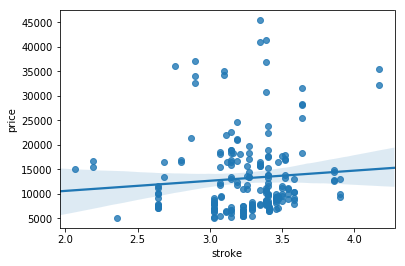

In [22]:
sns.regplot(x='stroke',y='price',data=df)

## Variables catégoriques

C'est avec les boxplot que l'influence des varibles catégoriques sera étudiée.

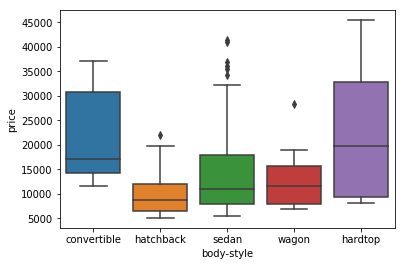

In [23]:
#body-style et price
sns.boxplot(x="body-style", y="price", data=df) #si on a des bosplot écrasés sur eux memes c'est que c'est bon a garder

La caractéristique 'body-style' semble être un bon prédicteur de la colonne "price" :

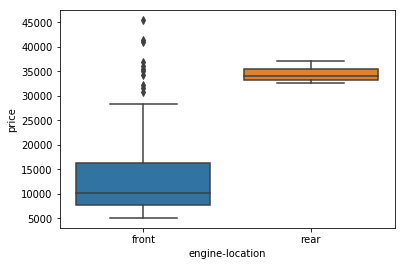

In [24]:
sns.boxplot(x="engine-location", y="price", data=df) #on peut s'en douter car cela ressemble aux voitures de sport qui ont le moteur à l'arrières

La colonne engine-location semble aussi être un très bon prédicteur de price. 

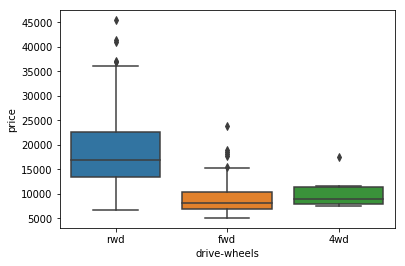

In [26]:
sns.boxplot(x="drive-wheels", y="price", data=df)

## 5. Correlation

## Correlation de Pearson
La Correlation de Pearson mesure la dépendence linéaire entre 2 variables, X et Y.
Le coefficient résultant est une valeur entre -1 et 1 :
- **1**: corrélation positive totale,
- **0**: aucune corrélation, les deux variables n'ont aucune influence l'une sur l'autre
- **-1**: negative linéaire totale.

Il existe une seconde mesure permettant de qualifier cette corrélation  : test de significativité

**P-value**:<br> 
En français, p-valeur, est une mesure de la probabilité que la dépendance (la corrélation) entre deux variables soit statistiquement signifiante. Le niveau requis est de 0.05 qui signifie qu'on accorde 95% de confiance à la corrélation obtenue.

Par convention, lorsque p-value est:
- < 0.001 probabilité très forte
- < 0.05; probabilité moyenne mais acceptable
- < 0.1; tprobabilité faible
- Plus que 0.1: aucune chance !

C'est dans la librairie stats de "scipy"  que l'on trouve la fonction donnant la p-valeur.:

In [5]:
from scipy import stats

### Calcul de quelque p-valeurs

In [6]:
#Wheel-base vs Price
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("Coefficient de correlation wheel-base :", pearson_coef, " avec P-value =", p_value)
#Horsepower vs price
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("Coefficient de correlation horsepower:", pearson_coef, " avec P-value =", p_value) 
#Length vs price
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("Coefficient de correlation length:", pearson_coef, " avec P-value =", p_value) 
#les p values en dessous de 1 milieme sont tres pertinentes

Coefficient de correlation wheel-base : 0.5891470005448702  avec P-value = 4.4570195020504053e-20
Coefficient de correlation horsepower: 0.8096565575365612  avec P-value = 1.0468839625927006e-47
Coefficient de correlation length: 0.6910440897821905  avec P-value = 9.960963222348607e-30


##### Conclusion: 
Les p-value sont < 0.001, les correlations obtenues sont donc statistiquement très signifiantes même si parfois le coefficient de corrélation l'indique moins (0,58..)

## Conclusion:  Variables retenues

On peut, maintenant restreindre la liste de variables à celles qui ont le plus d'iparct sur la cible price :

Variables numériques continues
- Length
- Width
- Curb-weight
- Engine-size
- Horsepower
- City-L/100km
- Highway-L/100km
- Wheel-base
- Bore

Variables catégoriques
- Drive-wheels
- Make


In [31]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-L/100km', 'highway-L/100km', 'price',
       'horsepower-groupe', 'fuel-type_gas', 'aspiration_turbo'],
      dtype='object')

In [8]:
df_final =df[['length','width', 'curb-weight', 'engine-size', 'horsepower', 'city-L/100km', 'highway-L/100km','wheel-base','bore','drive-wheels','make','price']]
df_final = pd.get_dummies(df_final, columns=['make'], drop_first=True)
df_final = pd.get_dummies(df_final, columns=['drive-wheels'], drop_first=True)#get dummies sur ces colones car ce sont des catégories
df_final.head()

,length,width,curb-weight,engine-size,horsepower,city-L/100km,highway-L/100km,wheel-base,bore,price,...,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,drive-wheels_fwd,drive-wheels_rwd
0,-0.439616,-0.855008,2548,130,111,11.190476,8.703704,88.6,3.47,16500.0,...,0,0,0,0,0,0,0,0,0,1
1,-0.245239,-0.189262,2823,152,154,12.368421,9.038462,94.5,2.68,16500.0,...,0,0,0,0,0,0,0,0,0,1
2,0.192109,0.143611,2337,109,102,9.791667,7.833333,99.8,3.19,13950.0,...,0,0,0,0,0,0,0,0,1,0
3,0.192109,0.238717,2824,136,115,13.055556,10.681818,99.4,3.19,17450.0,...,0,0,0,0,0,0,0,0,0,0
4,0.248803,0.191164,2507,136,110,12.368421,9.400000,99.8,3.19,15250.0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
df_final.to_csv("cars_final.csv")

### JPP

<hr>
Copyright &copy; 2020 Hatem & Driss @NEEDEMAND